Рассмотрим задачу об управлении колебаниями маятника под действием ограниченной внешней силы $u(t)$. Требуется к заданному наперед моменту времени $T$ перевести рассматриваемый объект из начального положения $x_0 = (3\pi, 0)$ как можно ближе к наперед заданному положению $x_T=(-\pi,0)$ при помощи допустимого управления $u(t)$, затратив при этом как можно меньше энергии.

Иными словами, требуется решить задачу многокритериальной оптимизации
\begin{equation}
\label{1.1}
J(u)=\left((x_1(T)+\pi)^2, (x_2(T))^2, \int\limits_{0}^T u^2(t)dt\right) \to S_{min}
\end{equation}
где $x(t)=(x_1(t), x_2(t))$ -- положение и скорость маятника в момент времени $t$, удовлетворяющее условиям
\begin{gather*}
\begin{cases}
\dot x_1(t) = x_2(t)+u_1(t)\\
\dot x_2(t) = -x_1(t) + u_2(t), \quad x_1(0) = 3\pi, \; x_2(0) = 0 , \; 0 \leqslant t \leqslant T, \\
u(\cdot) \in U=\{u(t)=(u_1(t), u_2(t)) \in L_2^2(0,T): \; u_1^2(t) + u_2^2(t) \leqslant 1\}
\end{cases}
\end{gather*}

Замечание:
Рассмотрите случаи


1. $T=t_*$

2. $T > t_*$

3. $T < t_*$

где $t_* = \pi$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy.optimize import minimize

In [2]:
def J1(u, tau, T, e):
    x_1T = tau*(np.dot(e,u*mt.sin(T)+u*mt.cos(T))*mt.sin(T)+np.dot(e,u*mt.cos(T)-u*mt.sin(T))*mt.cos(T))-3*mt.pi*mt.cos(T)
    return (x_1T+mt.pi)*(x_1T+mt.pi)

In [3]:
def J2(u, tau, T, e):
    x_2T = tau*(np.dot(e,u*mt.sin(T)+u*mt.cos(T))*mt.cos(T)-np.dot(e,u*mt.cos(T)-u*mt.sin(T))*mt.sin(T))-3*mt.pi*mt.sin(T)
    return x_2T*x_2T

In [4]:
def J3(u, tau, e):
    return tau*np.dot(u*u, e)

In [5]:
def J_main(u, tau, T, alfa, beta,e):
    J = alfa*J1(u,tau, T,e) + beta*J2(u,tau, T,e) + (1-alfa-beta)*J3(u, tau, e)
    return J

In [6]:
def my_minimize(N, tau, T, alfa, beta, e):
    const = 0.0
    u0 = np.array([const]* N)
    my_args = (tau, T, alfa, beta, e)
    mybounds = [(-1, 1)]*N
    res = minimize(J_main, u0, method='BFGS', args=my_args, bounds=mybounds, options={'disp': False})
    return res.x

In [11]:
def minimize_with_parameters(N, T, tau, Num):
    eps=0.2
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    beta_mass = np.linspace(0.0, 1.0, Num)
    alfa_mass = 1-beta_mass-eps
    u_mass = []
    for alfa in alfa_mass:
        u = my_minimize(N, tau, T, alfa, 1-alfa-tau, e)
        u_mass.append(u)
    return u_mass

In [12]:
def get_F_values(U, N, tau, T):
    e = np.array([0.5 if i == 0 or i == N-1 else 1.0 for i in range(0, N)])
    J1_dg, J2_dg, J3_dg = [], [], []
    for u in U:
        J1_dg.append(J1(u, tau, T, e))
        J2_dg.append(J2(u, tau, T, e))
        J3_dg.append(J3(u, tau, e))
    return (J1_dg, J2_dg, J3_dg)

In [13]:
tau = 0.01
num =100

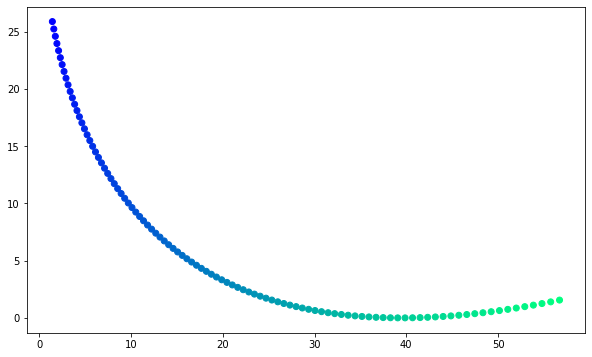

In [18]:
T1 =  mt.pi/2*3
N1 = int(T1/tau)
result = minimize_with_parameters(N1, T1, tau, num)
f_values_mass = get_F_values(result, N1, tau, T1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(f_values_mass[0], f_values_mass[1], cmap='winter', c=[i*(1.0/float(num-1)) for i in range(0, num)])

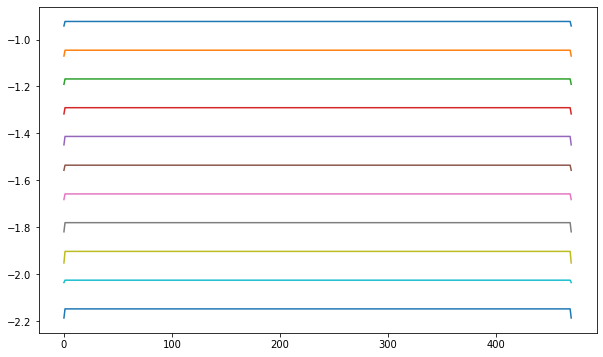

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in [i*9 for i in range(0, 11)]:
    ax.plot(result[i])